In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
library(pheatmap)
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


In [2]:
ASSAY  = "CRISPR"
FOLDER = "coverage_astarrseq_peak_macs_input"
FDIRY  = file.path(FD_RES, "results", ASSAY, FOLDER)

fglob  = file.path(FD_RES, "results", ASSAY, FOLDER, "*HCRFF*bed.gz")
fnames = basename(Sys.glob(fglob))
print(fnames)

 [1] "CAPRIN1_HCRFF_rAVG.log2FC_2.bed.gz" "CAT_HCRFF_rAVG.log2FC_2.bed.gz"    
 [3] "CD164_HCRFF_rAVG.log2FC_2.bed.gz"   "ERP29_HCRFF_rAVG.log2FC_2.bed.gz"  
 [5] "FADS1_HCRFF_rAVG.log2FC_2.bed.gz"   "FADS2_HCRFF_rAVG.log2FC_2.bed.gz"  
 [7] "FADS3_HCRFF_rAVG.log2FC_2.bed.gz"   "FEN1_HCRFF_rAVG.log2FC_2.bed.gz"   
 [9] "GATA1_HCRFF_rAVG.log2FC_2.bed.gz"   "HBE1_HCRFF_rAVG.log2FC_2.bed.gz"   
[11] "HBG1_HCRFF_rAVG.log2FC_2.bed.gz"    "HBG2_HCRFF_rAVG.log2FC_2.bed.gz"   
[13] "HBS1L_HCRFF_rAVG.log2FC_2.bed.gz"   "HDAC6_HCRFF_rAVG.log2FC_2.bed.gz"  
[15] "LMO2_HCRFF_rAVG.log2FC_2.bed.gz"    "MEF2C_HCRFF_rAVG.log2FC_2.bed.gz"  
[17] "MYB_HCRFF_rAVG.log2FC_2.bed.gz"     "MYC_HCRFF_rAVG.log2FC_2.bed.gz"    
[19] "NMU_HCRFF_rAVG.log2FC_2.bed.gz"     "PVT1_HCRFF_rAVG.log2FC_2.bed.gz"   


In [3]:
str_split_fixed(fnames[1], "_", 2)[,1]

[1] "CAPRIN1"

In [4]:
dat_meta = data.frame(
    Gene  = str_split_fixed(fnames, "_", 2)[,1],
    FName = fnames
)
dat_meta

Gene,FName
<chr>,<chr>
CAPRIN1,CAPRIN1_HCRFF_rAVG.log2FC_2.bed.gz
CAT,CAT_HCRFF_rAVG.log2FC_2.bed.gz
CD164,CD164_HCRFF_rAVG.log2FC_2.bed.gz
ERP29,ERP29_HCRFF_rAVG.log2FC_2.bed.gz
FADS1,FADS1_HCRFF_rAVG.log2FC_2.bed.gz
FADS2,FADS2_HCRFF_rAVG.log2FC_2.bed.gz
FADS3,FADS3_HCRFF_rAVG.log2FC_2.bed.gz
FEN1,FEN1_HCRFF_rAVG.log2FC_2.bed.gz
GATA1,GATA1_HCRFF_rAVG.log2FC_2.bed.gz


In [5]:
ASSAY  = "CRISPR"
FOLDER = "coverage_astarrseq_peak_macs_input"
FDIRY  = file.path(FD_RES, "results", ASSAY, FOLDER)

fglob  = file.path(FD_RES, "results", ASSAY, FOLDER, "*HCRFF*bed.gz")
fpaths = Sys.glob(fglob)

fpath = fpaths[1]
fname = basename(fpath)
gene  = str_split_fixed(fname, "_", 2)[,1]

cnames = c("Chrom", "Start", "End", "Score")
dat = read_tsv(fpath, col_names = cnames)
head(dat)

Rows: 247520 Columns: 4
── Column specification ───────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Chrom, Score
dbl (2): Start, End

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Chrom,Start,End,Score
<chr>,<dbl>,<dbl>,<chr>
chr1,10015,10442,.
chr1,14253,14645,.
chr1,16015,16477,.
chr1,17237,17772,.
chr1,28903,29613,.
chr1,30803,31072,.


In [6]:
head(dat)

Chrom,Start,End,Score
<chr>,<dbl>,<dbl>,<chr>
chr1,10015,10442,.
chr1,14253,14645,.
chr1,16015,16477,.
chr1,17237,17772,.
chr1,28903,29613,.
chr1,30803,31072,.


In [21]:
ASSAY  = "CRISPR"
FOLDER = "coverage_astarrseq_peak_macs_input"
FDIRY  = file.path(FD_RES, "results", ASSAY, FOLDER)

fglob  = file.path(FD_RES, "results", ASSAY, FOLDER, "*HCRFF*bed.gz")
fpaths = Sys.glob(fglob)

lst = lapply(fpaths, function(fpath){
    fname = basename(fpath)
    gene  = str_split_fixed(fname, "_", 2)[,1]
    
    cnames = c("Chrom", "Start", "End", "Score")
    dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
    dat$Gene = gene
    return(dat)
})
lst_dat = lst
lst[[1]] %>% head

Chrom,Start,End,Score,Gene
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr1,10015,10442,.,CAPRIN1
chr1,14253,14645,.,CAPRIN1
chr1,16015,16477,.,CAPRIN1
chr1,17237,17772,.,CAPRIN1
chr1,28903,29613,.,CAPRIN1
chr1,30803,31072,.,CAPRIN1


In [8]:
dat = bind_rows(lst) %>% 
    dplyr::filter(Score != ".") %>%
    dplyr::mutate(
        Peak  = paste(Chrom, Start, End, sep="_"),
        Score = as.double(Score))
head(dat)

Chrom,Start,End,Score,Gene,Peak
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
chr10,100729027,100729908,-0.04143173,CAPRIN1,chr10_100729027_100729908
chr10,100731148,100731673,-0.03527227,CAPRIN1,chr10_100731148_100731673
chr10,100735439,100736071,-0.14598020,CAPRIN1,chr10_100735439_100736071
chr10,100739703,100739976,0.81755783,CAPRIN1,chr10_100739703_100739976
chr10,100743327,100744629,-0.05910615,CAPRIN1,chr10_100743327_100744629
chr10,100745384,100746029,0.26605922,CAPRIN1,chr10_100745384_100746029


In [9]:
summary(dat$Score)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.327500 -0.129181 -0.036783  0.006078  0.067807  5.978311 

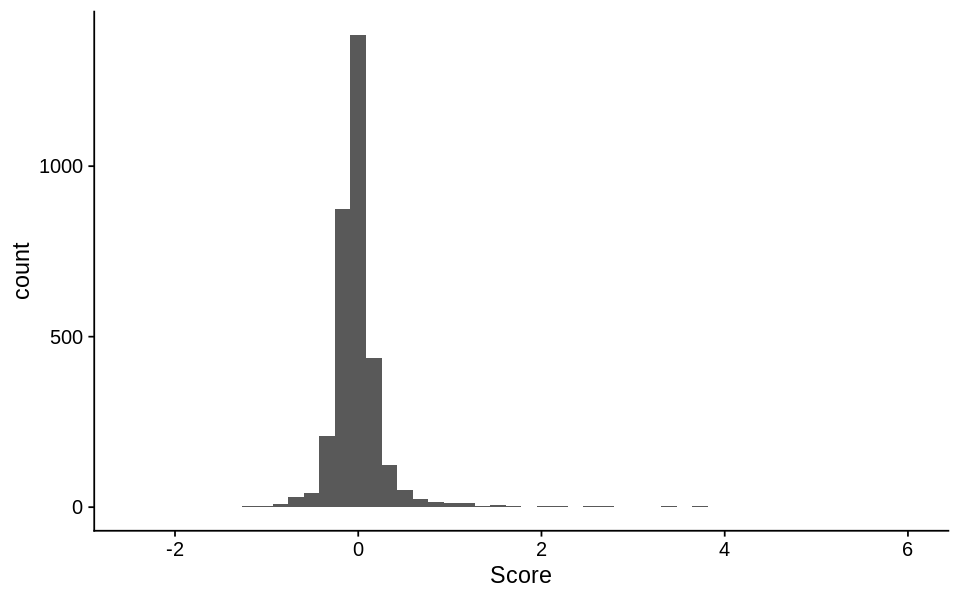

In [10]:
dat = bind_rows(lst) %>% 
    dplyr::filter(Score != ".") %>%
    dplyr::mutate(
        Peak  = paste(Chrom, Start, End, sep="_"),
        Score = as.double(Score))

options(repr.plot.height=5, repr.plot.width=8)
gpt = ggplot(dat, aes(x=Score)) + geom_histogram(bins=50) + theme_cowplot()
print(gpt)

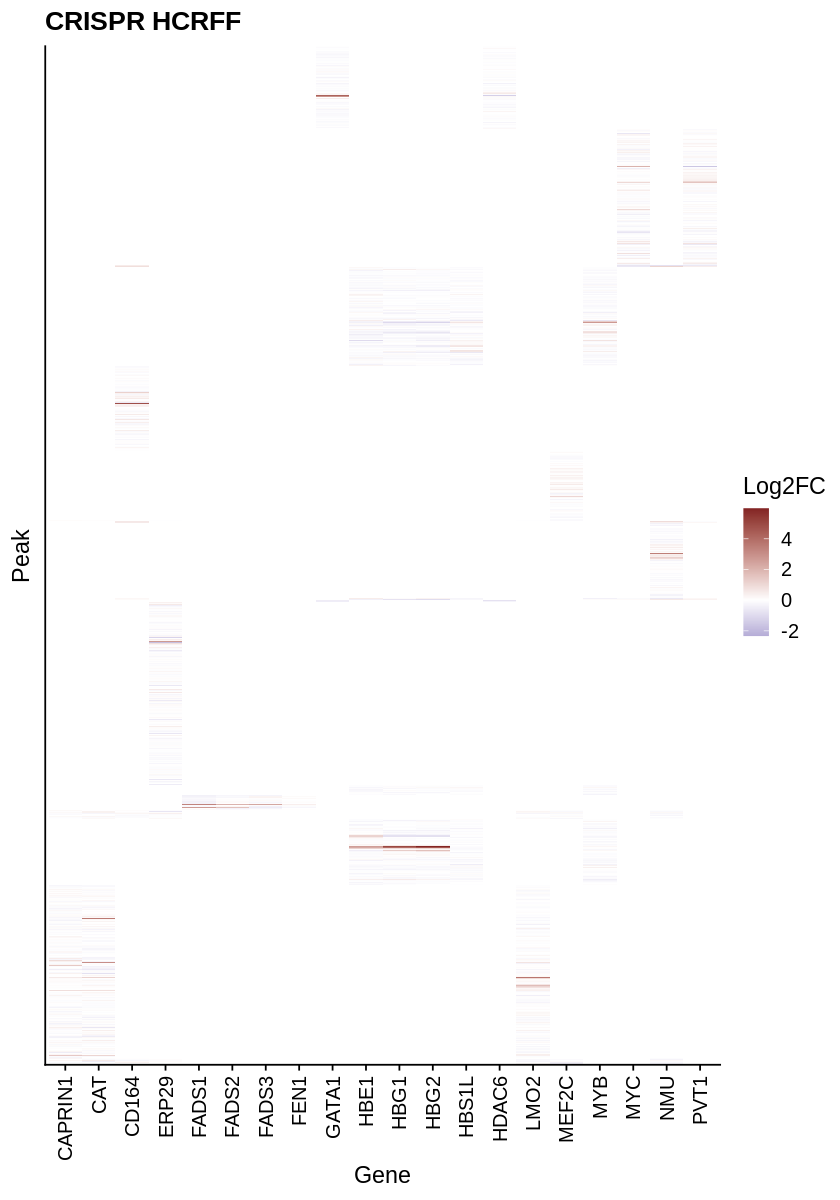

In [11]:
dat = bind_rows(lst) %>% 
    dplyr::filter(Score != ".") %>%
    dplyr::mutate(
        Peak  = paste(Chrom, Start, End, sep="_"),
        Score = as.double(Score))

dat = dat %>% 
    tidyr::spread(Gene, Score) %>% 
    dplyr::mutate(across(where(is.numeric), ~replace_na(.,0)))

dat = dat %>% 
    dplyr::select(-Chrom, -Start, -End) %>% 
    tidyr::gather(Gene, Log2FC, -Peak)

gpt = ggplot(dat, aes(x=Gene, y=Peak, fill=Log2FC)) + 
    geom_tile() + 
    scale_fill_gradient2(
        low  = scales::muted("blue"),
        mid  = "white",
        high = scales::muted("red"),
        midpoint = 0) +
    labs(title="CRISPR HCRFF") +
    theme_cowplot() +
    theme(
        axis.text.x  = element_text(angle=90, vjust=0.5, hjust=1),
        axis.text.y  = element_blank(),
        axis.ticks.y = element_blank()
    )

options(repr.plot.height=10, repr.plot.width=7)
print(gpt)

In [22]:
lst = lst_dat
dat = bind_rows(lst) %>% 
    dplyr::filter(Score != ".") %>%
    dplyr::mutate(
        Peak  = paste(Chrom, Start, End, sep="_"),
        Score = as.double(Score))

###
dat = dat %>% 
    tidyr::spread(Gene, Score) %>% 
    dplyr::mutate(across(where(is.numeric), ~replace_na(.,0)))

dat_score     = dat %>% dplyr::select(-Chrom, -Start, -End) %>% column_to_rownames(var = "Peak")
head(dat_score)

,CAPRIN1,CAT,CD164,ERP29,FADS1,FADS2,FADS3,FEN1,GATA1,HBE1,HBG1,HBG2,HBS1L,HDAC6,LMO2,MEF2C,MYB,MYC,NMU,PVT1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr10_100729027_100729908,-0.04143173,-0.22290540,-0.381589800,0.559668467,0,0,0,0,0,0,0,0,0,0,0.03181413,-0.46880533,0,0,-0.07762600,0
chr10_100731148_100731673,-0.03527227,-0.05954518,0.008669636,0.003663182,0,0,0,0,0,0,0,0,0,0,0.18322736,-0.47427727,0,0,-0.25979427,0
chr10_100735439_100736071,-0.14598020,-0.09435440,0.374631500,-0.037476400,0,0,0,0,0,0,0,0,0,0,-0.04946440,-0.44736270,0,0,-0.18364520,0
chr10_100739703_100739976,0.81755783,0.28808567,0.280868000,-0.001013833,0,0,0,0,0,0,0,0,0,0,-0.14688583,-0.05878650,0,0,-0.67073167,0
chr10_100743327_100744629,-0.05910615,-0.50738115,0.162006769,0.086618731,0,0,0,0,0,0,0,0,0,0,-0.24862423,0.12199173,0,0,-0.09793646,0
chr10_100745384_100746029,0.26605922,0.57394611,-0.288053222,-0.110060333,0,0,0,0,0,0,0,0,0,0,-0.17959489,-0.04870378,0,0,0.17618489,0


In [23]:
genes = c(
    "NMU",
    "MEF2C",
    "CD164",
    "MYB", "HBS1L", "HBG1", "HBG2", "HBE1",
    "PVT1", "MYC",
    "LMO2", "CAPRIN1", "CAT",
    "FADS1", "FADS2", "FADS3", "FEN1",
    "ERP29",
    "GATA1", "HDAC6"
)

dat = bind_rows(lst)
print(unique(dat$Gene))
print(setdiff(unique(dat$Gene), genes))

 [1] "CAPRIN1" "CAT"     "CD164"   "ERP29"   "FADS1"   "FADS2"   "FADS3"  
 [8] "FEN1"    "GATA1"   "HBE1"    "HBG1"    "HBG2"    "HBS1L"   "HDAC6"  
[15] "LMO2"    "MEF2C"   "MYB"     "MYC"     "NMU"     "PVT1"   
character(0)


## Save table and results

In [24]:
###
lst = lst_dat
dat = bind_rows(lst) %>% 
    dplyr::filter(Score != ".") %>%
    dplyr::mutate(
        Peak  = paste(Chrom, Start, End, sep="_"),
        Score = as.double(Score)) %>%
    dplyr::select(Peak, Chrom, Start, End, Gene, Score)
head(dat)

Peak,Chrom,Start,End,Gene,Score
<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr10_100729027_100729908,chr10,100729027,100729908,CAPRIN1,-0.04143173
chr10_100731148_100731673,chr10,100731148,100731673,CAPRIN1,-0.03527227
chr10_100735439_100736071,chr10,100735439,100736071,CAPRIN1,-0.14598020
chr10_100739703_100739976,chr10,100739703,100739976,CAPRIN1,0.81755783
chr10_100743327_100744629,chr10,100743327,100744629,CAPRIN1,-0.05910615
chr10_100745384_100746029,chr10,100745384,100746029,CAPRIN1,0.26605922


In [32]:
###
lst = lst_dat
dat = bind_rows(lst) %>% 
    dplyr::filter(Score != ".") %>%
    dplyr::mutate(
        Peak  = paste(Chrom, Start, End, sep="_"),
        Score = as.double(Score)) %>%
    dplyr::select(Peak, Chrom, Start, End, Gene, Score)

### save
ASSAY  = "CRISPR"
FOLDER = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "result.Log2FC.hcrff.tsv"
fpath = file.path(fdiry, fname)

write_tsv(dat, fpath)

In [26]:
###
lst = lst_dat
dat = bind_rows(lst) %>% 
    dplyr::filter(Score != ".") %>%
    dplyr::mutate(
        Peak  = paste(Chrom, Start, End, sep="_"),
        Score = as.double(Score))

###
dat = dat %>% 
    tidyr::spread(Gene, Score) %>% 
    dplyr::mutate(across(where(is.numeric), ~replace_na(.,0))) %>% 
    dplyr::select(Peak, Chrom, Start, End, !!genes)

### sort by location
CHROMS = paste0("chr", c(1:22, "X", "Y"))
dat$Chrom = factor(dat$Chrom, levels=CHROMS)
dat = dat %>% dplyr::arrange(Chrom, Start, End)

head(dat)

Peak,Chrom,Start,End,NMU,MEF2C,CD164,MYB,HBS1L,HBG1,⋯,LMO2,CAPRIN1,CAT,FADS1,FADS2,FADS3,FEN1,ERP29,GATA1,HDAC6
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr2_129361843_129362257,chr2,129361843,129362257,0.57979600,0,0.134735,0.099261,-0.21383,-0.794888,⋯,0,0,0,0,0,0,0,0,0.000000,0.000000
chr3_128486843_128489642,chr3,128486843,128489642,0.00000000,0,0.000000,0.000000,0.00000,0.000000,⋯,0,0,0,0,0,0,0,0,0.260774,-0.137354
chr4_55270087_55270436,chr4,55270087,55270436,-0.08950373,0,0.000000,0.000000,0.00000,0.000000,⋯,0,0,0,0,0,0,0,0,0.000000,0.000000
chr4_55293902_55294193,chr4,55293902,55294193,-0.08497190,0,0.000000,0.000000,0.00000,0.000000,⋯,0,0,0,0,0,0,0,0,0.000000,0.000000
chr4_55296965_55297999,chr4,55296965,55297999,-0.34007295,0,0.000000,0.000000,0.00000,0.000000,⋯,0,0,0,0,0,0,0,0,0.000000,0.000000
chr4_55312019_55312784,chr4,55312019,55312784,0.21455504,0,0.000000,0.000000,0.00000,0.000000,⋯,0,0,0,0,0,0,0,0,0.000000,0.000000


In [33]:
###
lst = lst_dat
dat = bind_rows(lst) %>% 
    dplyr::filter(Score != ".") %>%
    dplyr::mutate(
        Peak  = paste(Chrom, Start, End, sep="_"),
        Score = as.double(Score))

###
dat = dat %>% 
    tidyr::spread(Gene, Score) %>% 
    dplyr::mutate(across(where(is.numeric), ~replace_na(.,0))) %>% 
    dplyr::select(Peak, Chrom, Start, End, !!genes)

### sort by location
CHROMS = paste0("chr", c(1:22, "X", "Y"))
dat$Chrom = factor(dat$Chrom, levels=CHROMS)
dat = dat %>% dplyr::arrange(Chrom, Start, End)

###
ASSAY  = "CRISPR"
FOLDER = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "matrix.Log2FC.hcrff.tsv"
fpath = file.path(fdiry, fname)

write_tsv(dat, fpath)

In [30]:
###
lst = lst_dat
dat = bind_rows(lst) %>% 
    dplyr::filter(Score != ".") %>%
    dplyr::mutate(
        Peak  = paste(Chrom, Start, End, sep="_"),
        Score = as.double(Score))

dat = dat %>%
    dplyr::group_by(Peak, Chrom, Start, End) %>%
    dplyr::summarize(
        Score_mean     = mean(Score), 
        Score_mean_abs = mean(abs(Score)), 
        N_Gene         = n(),
        .groups = "drop")
head(dat)

Peak,Chrom,Start,End,Score_mean,Score_mean_abs,N_Gene
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
chr10_100729027_100729908,chr10,100729027,100729908,-0.08583938,0.2548344,7
chr10_100731148_100731673,chr10,100731148,100731673,-0.09047555,0.1463499,7
chr10_100735439_100736071,chr10,100735439,100736071,-0.08337883,0.1904164,7
chr10_100739703_100739976,chr10,100739703,100739976,0.07272767,0.3234185,7
chr10_100743327_100744629,chr10,100743327,100744629,-0.07749011,0.1833807,7
chr10_100745384_100746029,chr10,100745384,100746029,0.05568257,0.2346575,7


In [31]:
table(dat$N_Gene)


  1   2   3   4   5   7   9  11 
550 295 230  24 235  20   3   1 

In [35]:
###
lst = lst_dat
dat = bind_rows(lst) %>% 
    dplyr::filter(Score != ".") %>%
    dplyr::mutate(
        Peak  = paste(Chrom, Start, End, sep="_"),
        Score = as.double(Score))

dat = dat %>%
    dplyr::group_by(Peak, Chrom, Start, End) %>%
    dplyr::summarize(
        Score_mean     = mean(Score), 
        Score_mean_abs = mean(abs(Score)), 
        N_Gene         = n(),
        .groups = "drop")

###
ASSAY  = "CRISPR"
FOLDER = "coverage_astarrseq_peak_macs_input"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "result.stats.hcrff.tsv"
fpath = file.path(fdiry, fname)

write_tsv(dat, fpath)

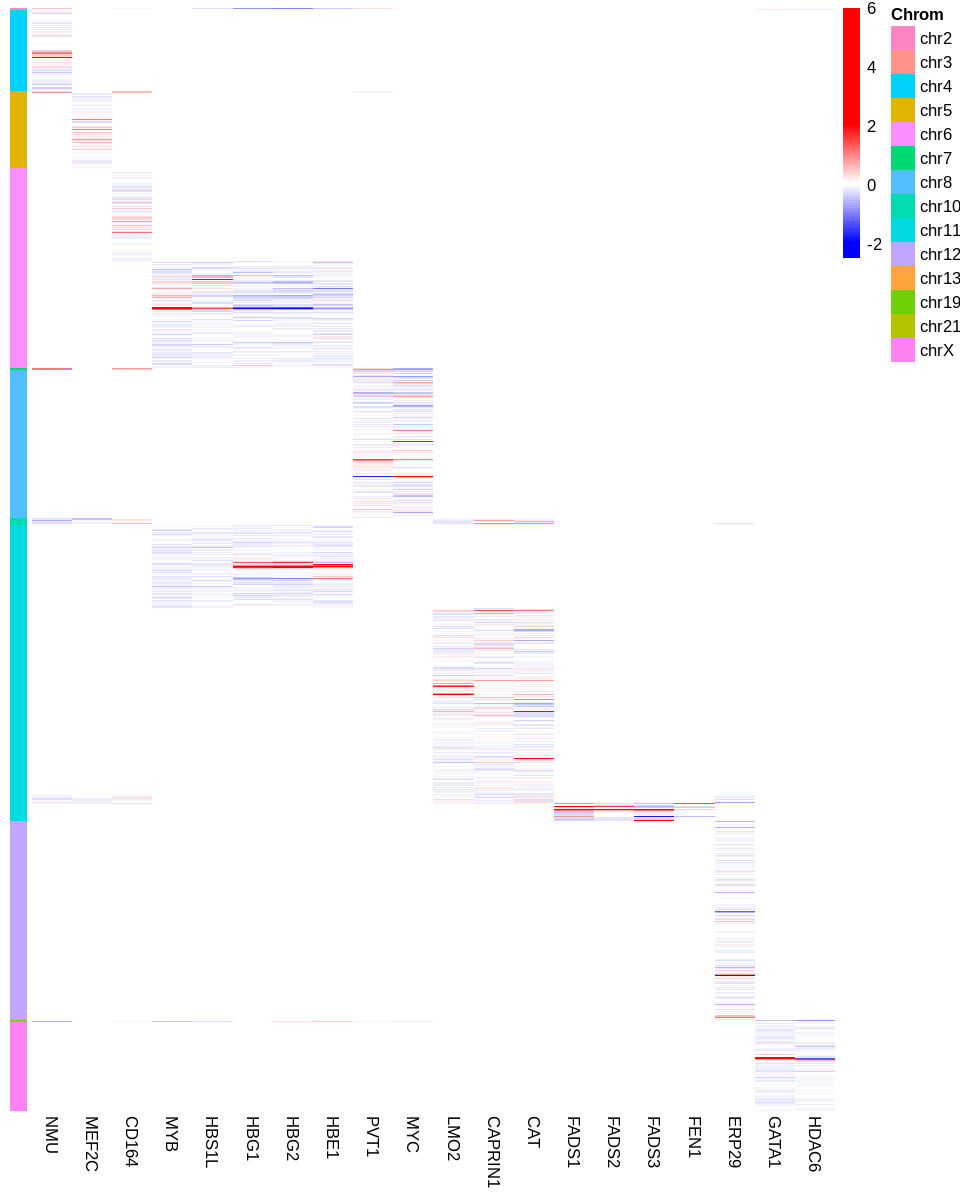

In [27]:
###
dat = bind_rows(lst) %>% 
    dplyr::filter(Score != ".") %>%
    dplyr::mutate(
        Peak  = paste(Chrom, Start, End, sep="_"),
        Score = as.double(Score))

###
dat = dat %>% 
    tidyr::spread(Gene, Score) %>% 
    dplyr::mutate(across(where(is.numeric), ~replace_na(.,0))) %>% 
    dplyr::select(Peak, Chrom, Start, End, !!genes)

### sort by location
CHROMS = paste0("chr", c(1:22, "X", "Y"))
dat$Chrom = factor(dat$Chrom, levels=CHROMS)
dat = dat %>% dplyr::arrange(Chrom, Start, End)

###
dat_annot_row = dat %>% dplyr::select(Peak, Chrom)          %>% column_to_rownames(var = "Peak")
dat_score     = dat %>% dplyr::select(-Chrom, -Start, -End) %>% column_to_rownames(var = "Peak")

###
mat  = dat_score
paletteLength = 50

bmin = -2.5
bmax =  6
xmin = -2 # min(mat)
xmax =  2 # max(mat)
nmin = ceiling((paletteLength-1)/2)
nmax = floor(  (paletteLength-1)/2)

myColor = c(
    "blue",
    colorRampPalette(c("blue", "white"))(nmin),
    "white",
    colorRampPalette(c("white", "red"))(nmax),
    "red"
)

myBreaks = c(
    bmin,
    seq(xmin, xmin/paletteLength, length.out=nmin),
    0,
    seq(xmax/paletteLength, xmax, length.out=nmax),
    bmax
)

options(repr.plot.height=10, repr.plot.width=8)
pheatmap(mat,
         cluster_row  = FALSE,
         cluster_cols = FALSE,
         show_rownames = FALSE,
         annotation_names_row = FALSE,
         annotation_row = dat_annot_row,
         color=myColor, 
         breaks=myBreaks)

In [18]:
print(names(dat))
print(length(names(dat)))

 [1] "Chrom"   "Start"   "End"     "Peak"    "CAPRIN1" "CAT"     "CD164"  
 [8] "ERP29"   "FADS1"   "FADS2"   "FADS3"   "FEN1"    "GATA1"   "HBE1"   
[15] "HBG1"    "HBG2"    "HBS1L"   "HDAC6"   "LMO2"    "MEF2C"   "MYB"    
[22] "MYC"     "NMU"     "PVT1"   
[1] 24


In [20]:
genes = c(
    "NMU",
    "MEF2C",
    "CD164",
    "MYB", "HBS1L", "HBG1", "HBG2", "HBE1",
    "PVT1", "MYC",
    "LMO2", "CAPRIN1", "CAT",
    "FADS1", "FADS2", "FADS3", "FEN1",
    "ERP29",
    "GATA1", "HDAC6"
)
length(genes)

[1] 20

In [21]:
setdiff(names(dat), genes)

[1] "Chrom" "Start" "End"   "Peak"

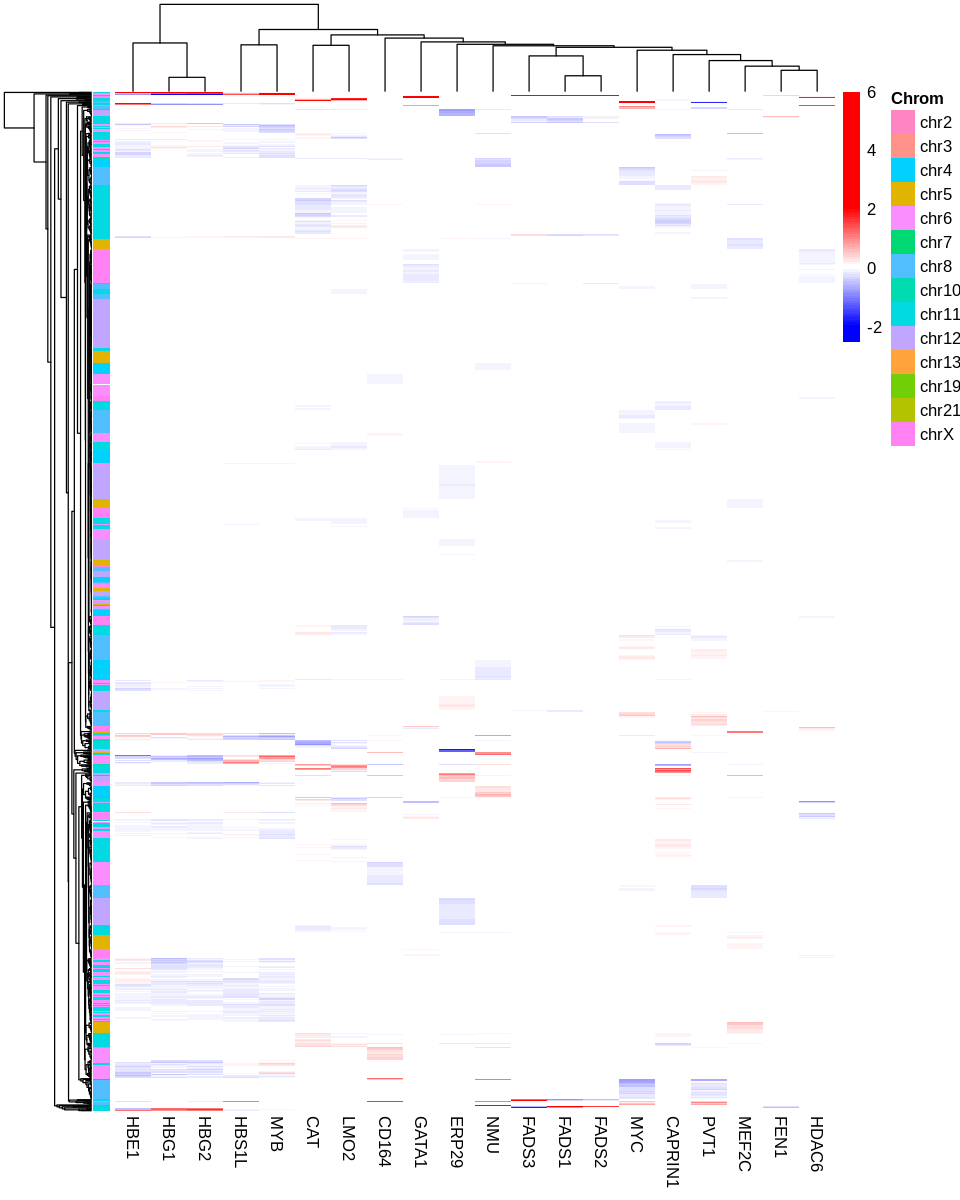

In [125]:
options(repr.plot.height=10, repr.plot.width=8)
pheatmap(mat,
         cluster_row  = TRUE,
         cluster_cols = TRUE,
         show_rownames = FALSE,
         annotation_names_row = FALSE,
         annotation_row = dat_annot_row,
         color=myColor, 
         breaks=myBreaks)